In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv")
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1


In [19]:
df.columns  
df.info()  
df.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218635 entries, 0 to 218634
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MeasureId            218635 non-null  int64  
 1   MeasureName          218635 non-null  object 
 2   MeasureType          218635 non-null  object 
 3   StratificationLevel  218635 non-null  object 
 4   StateFips            218635 non-null  int64  
 5   StateName            218635 non-null  object 
 6   CountyFips           218635 non-null  int64  
 7   CountyName           218635 non-null  object 
 8   ReportYear           218635 non-null  int64  
 9   Value                218635 non-null  float64
 10  Unit                 218635 non-null  object 
 11  UnitName             218635 non-null  object 
 12  DataOrigin           218635 non-null  object 
 13  MonitorOnly          218635 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 23.4+ MB


,MeasureId,StateFips,CountyFips,ReportYear,Value,MonitorOnly
count,218635.000000,218635.000000,218635.000000,218635.000000,2.186350e+05,218635.000000
mean,248.436979,30.228980,30328.039536,2005.997777,6.499649e+05,0.383950
std,86.333124,15.139346,15157.173159,3.432221,1.160826e+07,0.486347
min,83.000000,1.000000,1001.000000,1999.000000,0.000000e+00,0.000000
25%,292.000000,18.000000,18146.000000,2003.000000,0.000000e+00,0.000000
50%,293.000000,29.000000,29189.000000,2006.000000,2.000000e+00,0.000000
75%,295.000000,45.000000,45021.000000,2009.000000,1.394105e+01,1.000000
max,296.000000,56.000000,56045.000000,2013.000000,1.084153e+09,1.000000


In [20]:
# How many states are represented?
df['StateName'].nunique()

51

In [21]:
# Top 5 states with most records
df['StateName'].value_counts().head()

StateName
Texas             15651
Georgia           10213
Virginia           8739
Kentucky           8218
North Carolina     7812
Name: count, dtype: int64

In [23]:
#  What is the highest AQI value recorded?
df['Value'].max()

1084153095.0

In [24]:
#  What is the lowest AQI value recorded?
df['Value'].min()

0.0

In [25]:
#  Top 5 counties with most air quality records
df.groupby(['CountyName', 'StateName']).size().sort_values(ascending=False).head()

CountyName  StateName
Lake        Indiana      130
Outagamie   Wisconsin    130
Scott       Iowa         130
Ottawa      Michigan     130
Fayette     Kentucky     130
dtype: int64

In [28]:
# States with highest average ozone levels
ozone.groupby('StateName')['Value'].mean().sort_values(ascending=False).head()

StateName
California              1.663044e+07
Arizona                 5.257151e+06
District of Columbia    4.546460e+06
Connecticut             3.078840e+06
New Jersey              3.032619e+06
Name: Value, dtype: float64

In [40]:
# list of years with ozone data
ozone_years = sorted(ozone['ReportYear'].unique())
print(ozone_years)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


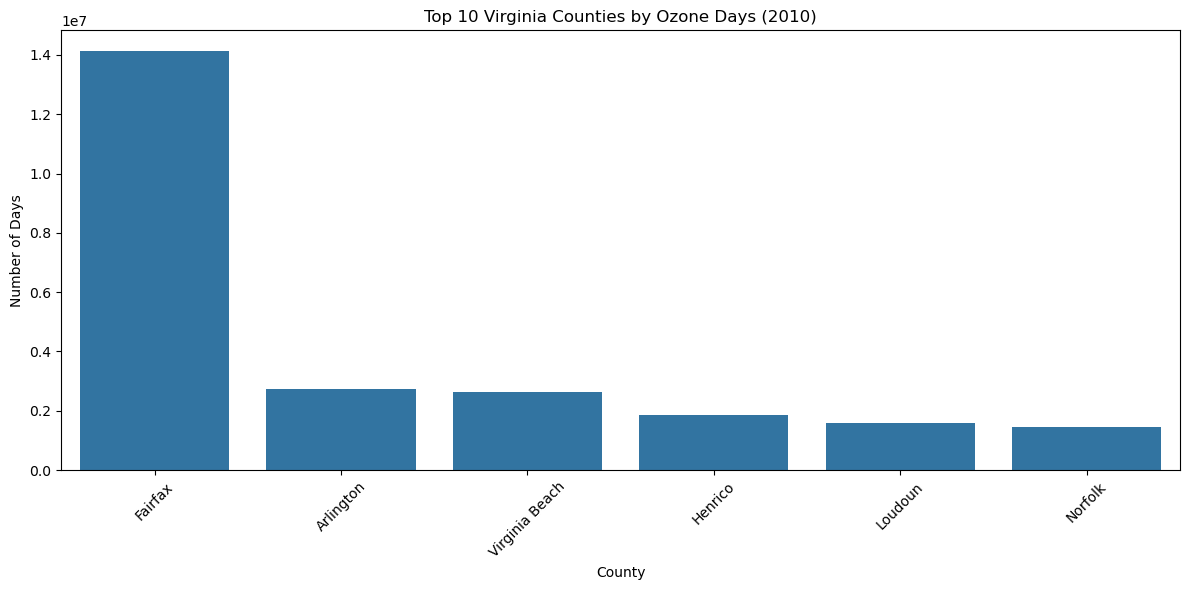

In [30]:
# Top 10 counties in Virginia with highest ozone days in 2010
bar_data = df[(df['StateName'] == 'Virginia') &
              (df['ReportYear'] == 2010) &
              (df['MeasureName'].str.contains("ozone"))]

bar_data = bar_data.sort_values(by='Value', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data, x='CountyName', y='Value')
plt.title("Top 10 Virginia Counties by Ozone Days (2010)")
plt.ylabel("Number of Days")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
